In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("~/library/gapminder.csv")

In [3]:
df1 = df.copy()

In [4]:
df = df.drop(["Region"],1)

In [5]:
scaler = StandardScaler()

In [6]:
y = df["child_mortality"]
df = df.drop(["child_mortality"],1)
cols = list(df)

In [7]:
df = scaler.fit_transform(df)

In [8]:
cols

['population',
 'fertility',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'life']

In [9]:
df

array([[-0.00631163, -0.17092402, -0.41328844, ..., -0.22597791,
         0.718822  ,  0.62679326],
       [-0.14349234,  2.1278789 ,  0.01920939, ..., -0.49826223,
         0.76815006, -1.24353439],
       [ 0.04474163, -0.47536008, -0.32223626, ..., -0.10412663,
        -1.75283262,  0.64879711],
       ...,
       [ 0.46820725, -0.71145336, -0.34499931, ..., -0.65595828,
        -1.06942126,  0.63779518],
       [-0.20514768,  1.78616495,  2.65972244, ..., -0.7106137 ,
         1.28984257, -1.93665581],
       [-0.2016571 ,  0.52492984,  3.00116809, ..., -0.80221117,
         1.18328677, -2.26671363]])

In [10]:
df = pd.DataFrame(df)

In [11]:
df.columns = cols

In [12]:
df["child_mortality"] = y

In [13]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,0.626793,29.5
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,-1.243534,192.0
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,0.648797,15.4
3,-0.298071,-0.997250,-0.413288,-0.425211,0.332681,-0.483632,1.370971,0.318739,20.0
4,-0.129488,-0.649324,-0.413288,2.170503,1.335817,1.289221,-2.093057,1.308913,5.2


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split as tts

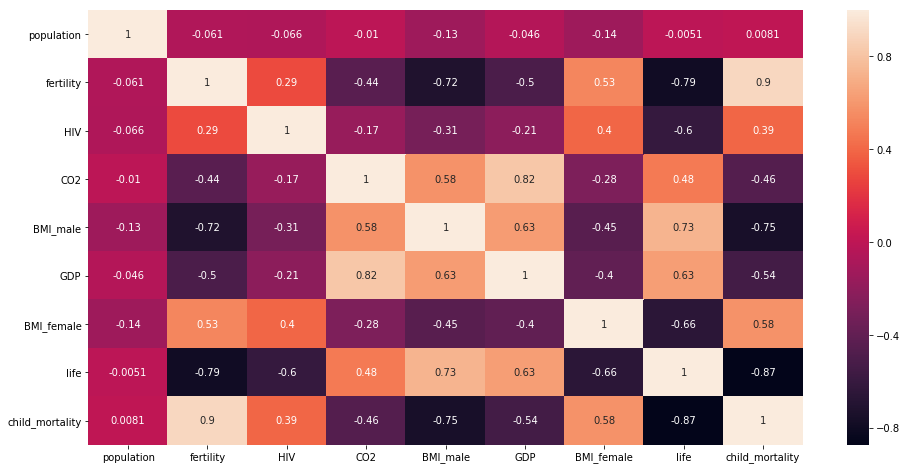

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

#### Feature selection with filter method

In [16]:
features_1 =["fertility", "BMI_female"]

In [17]:
df["Region"] = df1["Region"]

In [18]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,0.626793,29.5,Middle East & North Africa
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,-1.243534,192.0,Sub-Saharan Africa
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,0.648797,15.4,America
3,-0.298071,-0.997250,-0.413288,-0.425211,0.332681,-0.483632,1.370971,0.318739,20.0,Europe & Central Asia
4,-0.129488,-0.649324,-0.413288,2.170503,1.335817,1.289221,-2.093057,1.308913,5.2,East Asia & Pacific


In [20]:
X = df.drop(["child_mortality"],1)
y = df["child_mortality"]

In [22]:
X.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,Region
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,0.626793,Middle East & North Africa
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,-1.243534,Sub-Saharan Africa
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,0.648797,America
3,-0.298071,-0.997250,-0.413288,-0.425211,0.332681,-0.483632,1.370971,0.318739,Europe & Central Asia
4,-0.129488,-0.649324,-0.413288,2.170503,1.335817,1.289221,-2.093057,1.308913,East Asia & Pacific


In [23]:
X = pd.get_dummies(X)

In [24]:
X = X.drop(["Region_Sub-Saharan Africa"],1)

In [25]:
#feature selction with wrapper method
import statsmodels.api as sm

In [26]:
X = sm.add_constant(X)

In [28]:
model = sm.OLS(y,X).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        child_mortality   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     80.01
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           4.79e-54
Time:                        10:49:55   Log-Likelihood:                -572.93
No. Observations:                 139   AIC:                             1174.
Df Residuals:                     125   BIC:                             1215.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                50.9798      5.719      8.914      0.000      39.661      62.299
population                            1.0383      1.486      0.699      0.486      -1.902       3.978
fertility                            20.6336      3.649      5.655      0.000      13.412      27.855
HIV                                  -3.8002      2.178     -1.744      0.084      -8.112       0.511
CO2                                  -1.5155      2.601     -0.583      0.561      -6.663       3.632
BMI_male                             -2.9386      2.932     -1.002      0.318      -8.742       2.865
GDP                                   3.1654      3.127      1.012      0.313      -3.024       9.355
BMI_female                           -1.4701      2.434     -0.604      0.547      -6.287       3.347
life                                -23.1110      3.811     -6.064      0.000     -30.654     -15.568
Region_America                       -9.8618      8.469     -1.165      0.246     -26.622       6.899
Region_East Asia & Pacific          -12.0090      9.167     -1.310      0.193     -30.152       6.134
Region_Europe & Central Asia         -6.9227      8.537     -0.811      0.419     -23.819       9.974
Region_Middle East & North Africa    -6.5160      8.530     -0.764      0.446     -23.397      10.365
Region_South Asia                    -4.9003      9.934     -0.493      0.623     -24.562      14.761
==============================================================================
Omnibus:                       39.813   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.192
Skew:                           0.904   Prob(JB):                     5.50e-39
Kurtosis:                       8.211   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model.pvalues

const                                4.975126e-15
population                           4.858955e-01
fertility                            1.006854e-07
HIV                                  8.354540e-02
CO2                                  5.611705e-01
BMI_male                             3.182298e-01
GDP                                  3.134351e-01
BMI_female                           5.469482e-01
life                                 1.461233e-08
Region_America                       2.464330e-01
Region_East Asia & Pacific           1.925869e-01
Region_Europe & Central Asia         4.189861e-01
Region_Middle East & North Africa    4.463437e-01
Region_South Asia                    6.226967e-01
dtype: float64

In [32]:
X = X.drop(["const"],1)

ValueError: labels ['const'] not contained in axis

In [33]:
cols = list(X)
p_max = 1
while (len(cols)>0):
    p=[]
    X_1= X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = list(model.pvalues.values[1:])
    p = pd.Series(p,index = cols)
    p_max = max(p)
    features_with_p_max = p.idxmax()
    if (p_max>0.05):
        cols.remove(features_with_p_max)
    else:
        break
selected_features = cols

In [34]:
selected_features

['fertility', 'life']

In [35]:
#RFE
from sklearn.feature_selection import RFE

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg = LinearRegression()

In [38]:
features = RFE(lin_reg,6)

In [39]:
features.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=6, step=1, verbose=0)

In [40]:
features.ranking_

array([8, 1, 2, 7, 3, 4, 6, 1, 1, 1, 1, 1, 5])

In [58]:
features.support_

array([False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False])

In [41]:
cols = list(X)

In [42]:
cols = pd.Series(cols)

In [43]:
cols[features.support_]

1                             fertility
7                                  life
8                        Region_America
9            Region_East Asia & Pacific
10         Region_Europe & Central Asia
11    Region_Middle East & North Africa
dtype: object

In [44]:
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
model=  lin_reg.fit(X,y)

In [64]:
ok = pd.Series(abs(model.coef_), index = cols)

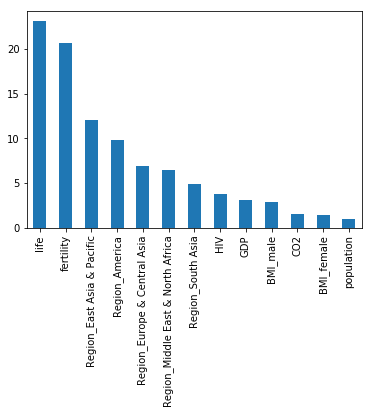

In [65]:
ok.sort_values(ascending=False).plot(kind="bar")

In [66]:
X = df1.drop(["child_mortality"],1)
y = df1["child_mortality"]

In [67]:
X = pd.get_dummies(X)

In [68]:
X = X.drop(['Region_Sub-Saharan Africa'],1)

In [69]:
model = lin_reg.fit(X,y)

In [70]:
cols = list(X)

In [71]:
ok = pd.Series(abs(model.coef_), index = cols)

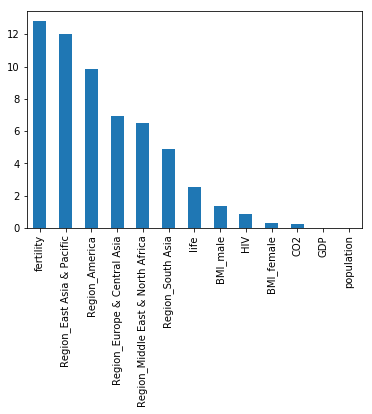

In [72]:
ok.sort_values(ascending=False).plot(kind="bar")

In [73]:
X

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,0,0,0,1,0
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,0,0,0,0,0
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,1,0,0,0,0
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,0,0,1,0,0
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,0,1,0,0,0
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,0,0,1,0,0
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,0,0,1,0,0
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,1,0,0,0,0
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,0,0,0,0,1
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,1,0,0,0,0
